In [1]:
from getdist import MCSamples, plots
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from src.hmc import Hmc
from src.pdf import Banana, Gaussian

names = [r'$x$',r'$y$']

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


  0%|          | 0/5080 [00:00<?, ?it/s]

Removed no burn in
Removed no burn in


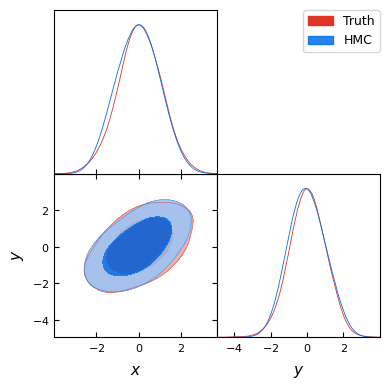

In [2]:
# Ex. Correlated Gaussian cov = [[1, 0.5], [0.5, 1]]
mass = jnp.array([[1, 0.5], [0.5, 1]])
hmc_samples = Hmc(jnp.array([0.0, 0.0]), 5000, 0.2, 2, Gaussian, mass,80)
hmc_samps = MCSamples(samples=hmc_samples, names=names,label="HMC")

# ==== Comparison with truth
true_samples = np.random.multivariate_normal(np.zeros(2),mass,1000)
true_samps = MCSamples(samples=true_samples, names=names,label="Truth")
# ====
g = plots.get_subplot_plotter()
g.triangle_plot([true_samps,hmc_samps], filled=True, smooth_scale_1D=1., smooth_scale_2D=1.)

  0%|          | 0/10800 [00:00<?, ?it/s]

Removed no burn in


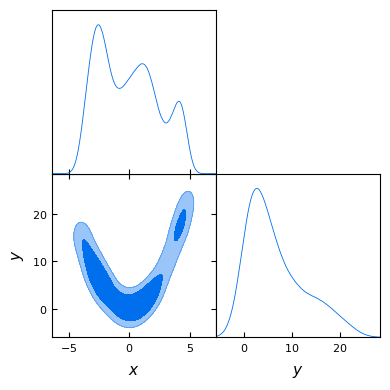

In [3]:
# Ex. Banana
samples = Hmc(jnp.array([0.0, 0.0]), 10000, 0.2, 2, Banana, jnp.eye(2),800)
samps = MCSamples(samples=samples, names=names)
g = plots.get_subplot_plotter()
g.triangle_plot([samps], filled=True, smooth_scale_1D=1., smooth_scale_2D=1.)
